In [2]:
# Importing the libraries and the data
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
plt.style.use('seaborn')

C:\Users\nikam\AppData\Local\Temp\ipykernel_14400\605116618.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
data = pd.read_csv('iris.csv')

# Viewing the data that we imported to pandas dataframe object 

In [7]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Viewing and Describing the data Now we view the Head and Tail of the data using head() and tail() respectively.


In [9]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Checking the sample size of data - how many samples are there in the dataset using len()

In [11]:
len(data)

150

## Checking the dimensions/shape of the dataset using shape.

In [12]:
data.shape

(150, 5)

## Viewing Column names of the dataset using

In [13]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is sepal_length
Column number 2 is sepal_width
Column number 3 is petal_length
Column number 4 is petal_width
Column number 5 is species


## So, our dataset has 5 columns named:
• Id
• SepalLengthCm
• SepalWidthCm
• PetalLengthCm
• PetalWidthCm
• Species.
View datatypes of each column in the dataset using

In [17]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Gathering Further information about the dataset using
info() 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Describing the data as basic statistics using describe()

In [19]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking the data for inconsistencies and further cleaning the data if needed. Checking data for missing values using insnull()

In [20]:
data.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


## Checking summary of missing values

In [21]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [23]:
data.head() 


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Modeling
## K - Means Clustering
K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.
Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created
by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that
the sum of squared errors is minimised between points and their respective centroids. We will use KMeans
Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The
distance between the centroids and the data points should be less.


## First we need to check the data for any missing values as it can ruin our model

In [27]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### We conclude that we don't have any missing values therefore we can go forward and start the clustering procedure.We will now view and select the data that we need for clustering.

In [28]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Checking the value count of the target column i.e. 'Species' using value_counts()


In [30]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Splitting into Training and Target data

In [31]:
target_data = data.iloc[:,4]
target_data.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [32]:
clustering_data =data.iloc[:,[0,1,2,3]]
clustering_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Now, we need to visualize the data which we are going to use for the clustering. This will give us a fair idea about the data we're working on. fig

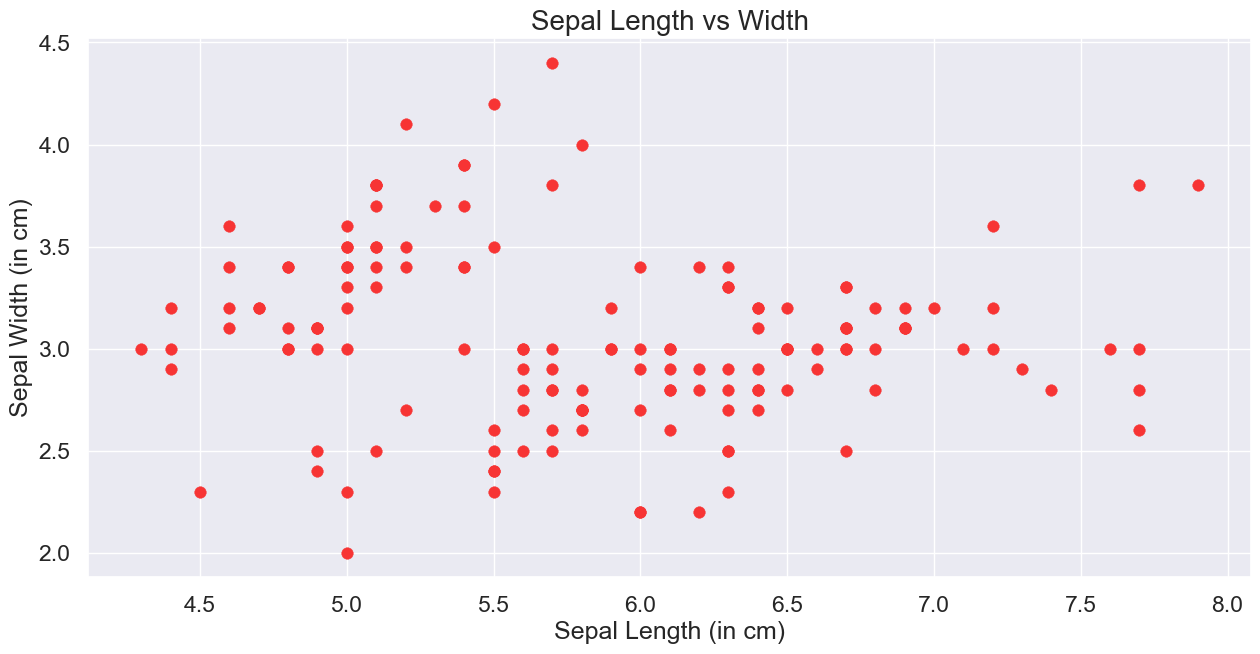

In [37]:
ax =plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=data['sepal_length'],y=data['sepal_width'], s=70, color='#f73434',edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize =20) 
plt.show()

## This gives us a fair Idea and patterns about some of the data.
## Determining No. of Clusters
## Required The Elbow Method
### The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center. 
### When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.
### We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula. formula
### where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.
### With this simple line of code we get all the inertia value or the within the cluster sum of square.

In [46]:
from sklearn.cluster import KMeans 
wcss=[]
for i in range(1, 11):
    km = KMeans(n_clusters=i)  # Specify the number of clusters
    km.fit(clustering_data)    # Fit the model to your data
    wcss.append(km.inertia_)
wcss_array = np.array(wcss)

# Display the WCSS values
print(wcss_array)

C:\Users\nikam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[680.8244     152.36870648  78.94084143  57.31787321  46.53558205
  38.93873974  34.20456779  29.9053743   27.99190833  26.39702985]


### Inertia can be recognized as a measure of how internally coherent clusters are. Now, we visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

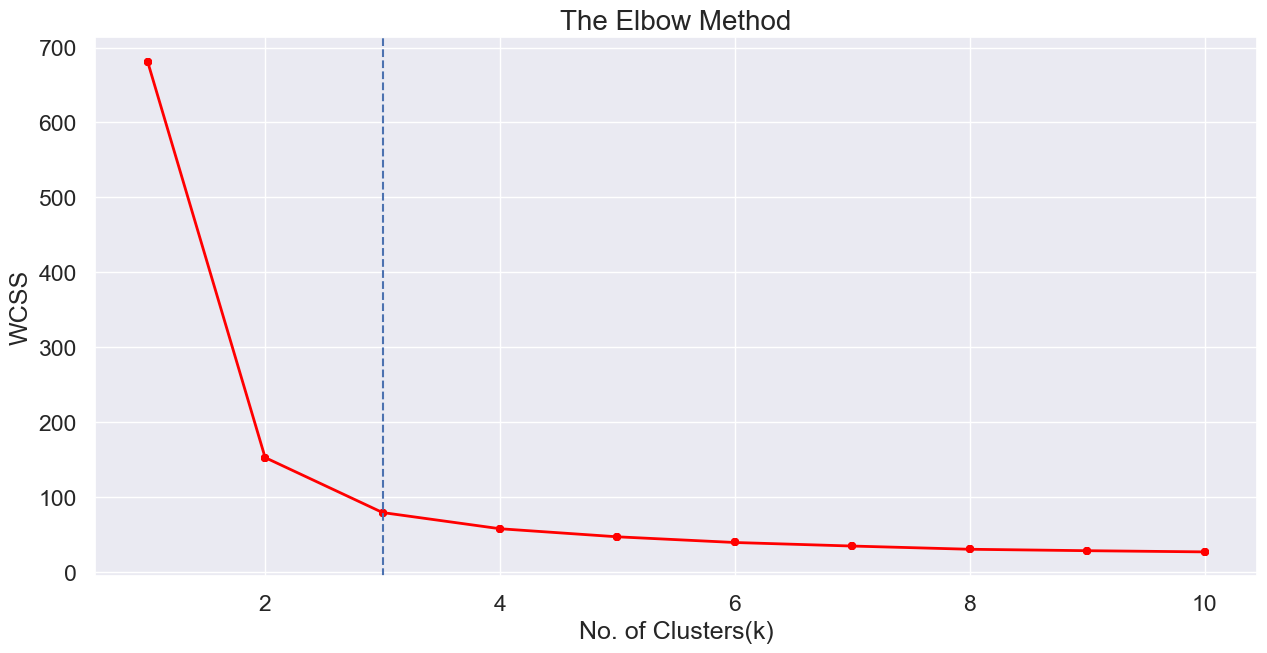

In [47]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters(k)')
plt.title('The Elbow Method', fontsize =20)
plt.show()

### It is clear, that the optimal number of clusters for our data are 3, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 3, it would be difficult to visualize the elbow if we choose the higher range.
### Clustering
### Now we will build the model for creating clusters from the dataset. We will use n_clusters = 3 i.e. 3 clusters as we have determined by the elbow method, which would be optimal for our dataset.
### Our data set is for unsupervised learning therefore we will use fit_predict() Suppose we were working with supervised learning data set we would use fit_tranform()

In [48]:
from sklearn.cluster import KMeans

In [50]:
kms = KMeans(n_clusters=3,init='k-means++') 
kms.fit(clustering_data)
KMeans(n_clusters=3)

C:\Users\nikam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

### Now that we have the clusters created, we will enter them into a different column

In [51]:
clusters = clustering_data.copy()


In [52]:
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

C:\Users\nikam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### We can also get the centroids of the clusters by the cluster_centers_ attribute of KMeans algorithm

In [53]:
kms.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Now we have all the data we need, we just need to plot the data. We will plot the data using scatterplot which will allow us to observe different clusters in different colours.


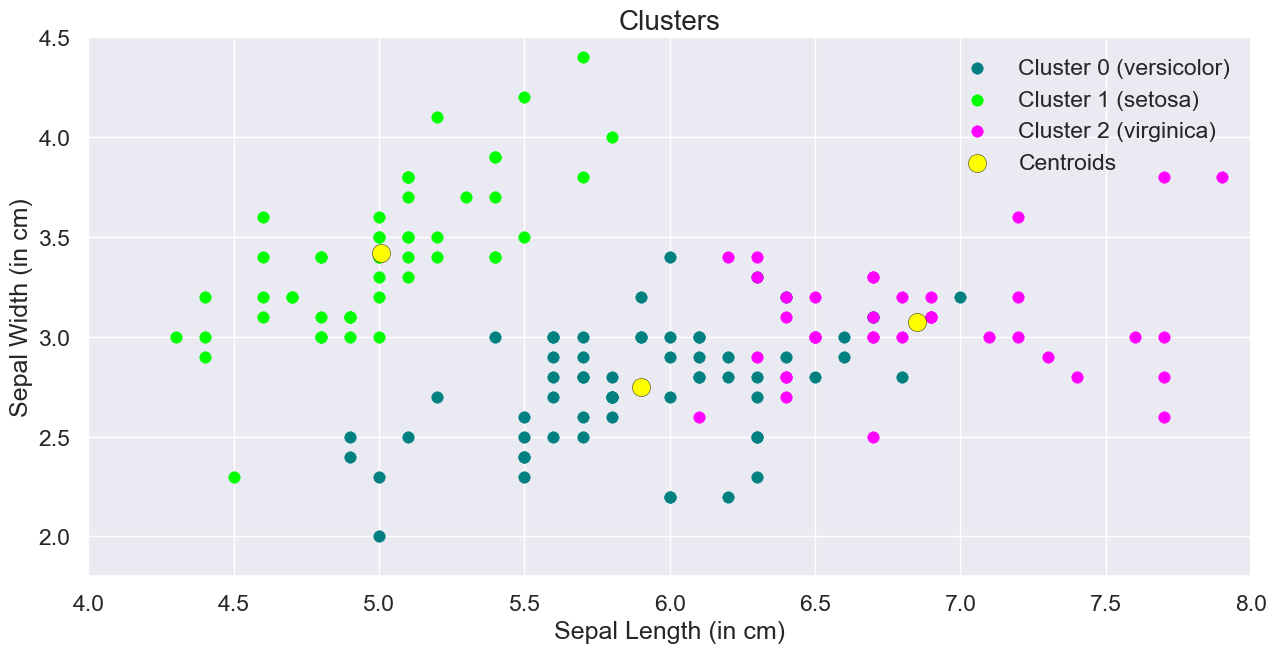

In [57]:
# Assuming 'clusters' is your DataFrame with cluster predictions
fig, ax = plt.subplots(figsize=(15, 7))

# Scatter plot for each cluster
plt.scatter(
    x=clusters[clusters['Cluster_Prediction'] == 0]['sepal_length'],
    y=clusters[clusters['Cluster_Prediction'] == 0]['sepal_width'],
    s=70, edgecolor='teal', linewidth=0.3, c='teal', label='Cluster 0 (versicolor)'
)

plt.scatter(
    x=clusters[clusters['Cluster_Prediction'] == 1]['sepal_length'],
    y=clusters[clusters['Cluster_Prediction'] == 1]['sepal_width'],
    s=70, edgecolor='lime', linewidth=0.3, c='lime', label='Cluster 1 (setosa)'
)

plt.scatter(
    x=clusters[clusters['Cluster_Prediction'] == 2]['sepal_length'],
    y=clusters[clusters['Cluster_Prediction'] == 2]['sepal_width'],
    s=70, edgecolor='magenta', linewidth=0.3, c='magenta', label='Cluster 2 (virginica)'
)

# Scatter plot for cluster centroids
plt.scatter(
    x=kms.cluster_centers_[:, 0], 
    y=kms.cluster_centers_[:, 1], 
    s=170, c='yellow', label='Centroids', edgecolor='black', linewidth=0.3
)

# Legend, limits, labels, and title
plt.legend(loc='upper right')
plt.xlim(4, 8)
plt.ylim(1.8, 4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize=20)

# Show plot
plt.show()
